In [1]:
import os
import csv
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from scapy.all import *
import matplotlib.pyplot as plt



2504267it [12:21, 3379.17it/s]


There are 5 source IP addresses with attack type ARP MitM
Destination port packet count
    Port    Count
0  58961   259008
1     -1  2125241
2  58974       21
3  58981       23
4  58977       21
5  58978       23
6    443   117578
7    554      168
Start timestamp 1502267087.057362 End timestamp 1502268297.615638 Timestamp span 1210.558276
192.168.2.15 start malicious activity at 10 min
192.168.2.13 start malicious activity at 10 min
169.254.174.17 start malicious activity at 10 min
192.168.2.1 start malicious activity at 11 min
192.168.2.1 sent packets less than a min


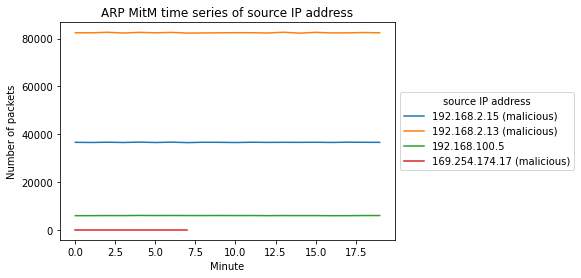

2771276it [12:01, 3841.32it/s]


There are 8 source IP addresses with attack type SYN DoS
Destination port packet count
    Port    Count
0     -1  1949512
1  63449       55
2  63453   574458
3   2946        4
4   3039        5
5   3040        5
6   3041        5
7   3042        5
8   3043        5
9   3044        5
Start timestamp 1488011312.825815 End timestamp 1488014482.046588 Timestamp span 3169.220773
192.168.3.11 start malicious activity at 50 min


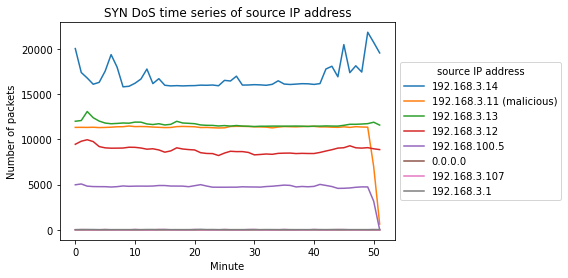

2278689it [11:11, 3393.11it/s]


There are 8 source IP addresses with attack type Active Wiretap
Destination port packet count
    Port    Count
0     -1  1888227
1  58977       13
2  58978       13
3  53471        1
4  61021        3
5  61412        8
6  61418       19
7  61420       19
8  57017        1
9  56985        1
Start timestamp 1502269013.367032 End timestamp 1502270329.604291 Timestamp span 1316.237259
192.168.2.13 start malicious activity at 10 min
192.168.2.15 start malicious activity at 10 min
192.168.0.110 start malicious activity at 11 min
192.168.0.110 sent packets less than a min
169.254.176.87 start malicious activity at 11 min
169.254.176.87 sent packets less than a min
0.0.0.0 start malicious activity at 11 min
192.168.2.1 start malicious activity at 11 min
192.168.2.3 start malicious activity at 11 min


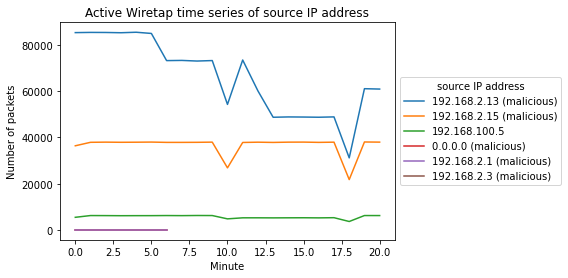

4077266it [18:57, 3582.95it/s]


There are 9 source IP addresses with attack type SSDP Flood
Destination port packet count
    Port    Count
0     -1  3423652
1  63447        1
2    443   206759
3    554      167
4  64855   445250
5  64863       47
6  64858       45
7    389      242
Start timestamp 1488015970.018869 End timestamp 1488018414.140941 Timestamp span 2444.122072
192.168.3.11 start malicious activity at 39 min
192.168.3.20 start malicious activity at 39 min
192.168.3.20 sent packets less than a min


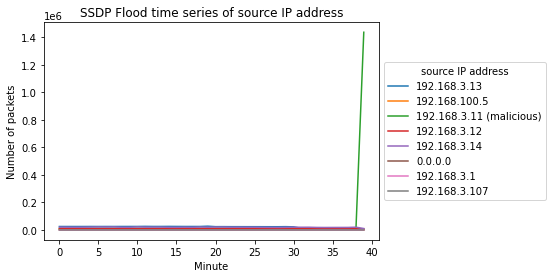

2472401it [12:40, 3251.01it/s]


There are 9 source IP addresses with attack type Video Injection
Destination port packet count
    Port    Count
0     -1  2469611
1  54866       36
2  54867       36
3    554      144
Start timestamp 1487596405.558628 End timestamp 1487598530.620281 Timestamp span 2125.061653
192.168.2.13 start malicious activity at 30 min
192.168.2.20 start malicious activity at 30 min
192.168.2.20 sent packets less than a min


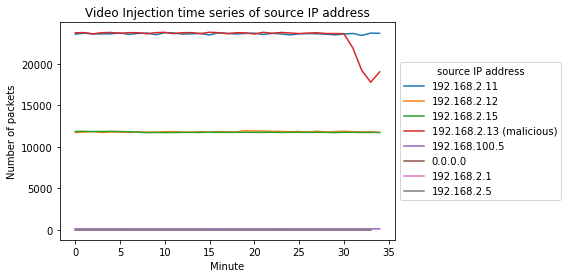

1344912it [05:59, 4088.77it/s]

In [ ]:


dirs = {'ARP MitM': 'C:\\COLLEGE\\internship\\archive (1)\\ARP MitM\\ARP_MitM_dataset.csv',
        'SYN DoS': r"C:\COLLEGE\internship\archive (1)\SYN DoS\SYN_DoS_dataset.csv",
        'Active Wiretap': 'C:\COLLEGE\internship\archive (1)\Active Wiretap\Active_Wiretap_dataset.csv',
        'SSDP Flood': 'C:\\COLLEGE\\internship\\archive (1)\\SSDP Flood\\SSDP_Flood_dataset.csv',
        'Video Injection': 'C:\\COLLEGE\\internship\\archive (1)\\Video Injection\\Video_Injection_dataset.csv',
        'SSL Renegotiation': 'C:\\COLLEGE\\internship\\archive (1)\\SSL Renegotiation\\SSL_Renegotiation_dataset.csv',
        'Mirai Botnet': 'C:\\COLLEGE\\internship\\archive (1)\\Mirai Botnet\\mirai_dataset.csv',  
        'Fuzzing': 'C:\\COLLEGE\\internship\\archive (1)\\Fuzzing\\Fuzzing_dataset.csv'}

pcaps = {'ARP MitM': r"C:\COLLEGE\internship\archive (1)\ARP MitM\ARP_MitM_pcap.pcapng",
         'SYN DoS': r"C:\COLLEGE\internship\archive (1)\SYN DoS\SYN_DoS_pcap.pcap",
         'Active Wiretap': r"C:\COLLEGE\internship\archive (1)\Active Wiretap\Active_Wiretap_pcap.pcapng",
         'SSDP Flood': r"C:\\COLLEGE\\internship\archive (1)\\SSDP Flood\\SSDP_Flood_pcap.pcap",
         'Video Injection': r"C:\\COLLEGE\\internship\archive (1)\\Video Injection\\Video_Injection_pcap.pcapng",
         'SSL Renegotiation': r"C:\\COLLEGE\\internship\archive (1)\\SSL Renegotiation\\SSL_Renegotiation_pcap.pcap",
         'Mirai Botnet': r'C:\\COLLEGE\\internship\archive (1)\\Mirai Botnet\\Mirai_pcap.pcap',  
         'Fuzzing': r'C:\\COLLEGE\\internship\archive (1)\\Fuzzing\\Fuzzing_pcap.pcapng'}

labels = {'ARP MitM': r"C:\COLLEGE\internship\archive (1)\ARP MitM\ARP_MitM_labels.csv",
          'SYN DoS': r"C:\COLLEGE\internship\archive (1)\SYN DoS\SYN_DoS_labels.csv",
          'Active Wiretap': r"C:\COLLEGE\internship\archive (1)\Active Wiretap\Active_Wiretap_labels.csv",
          'SSDP Flood': r"C:\\COLLEGE\\internship\archive (1)\\SSDP Flood\\SSDP_Flood_labels.csv",
          'Video Injection': r"C:\\COLLEGE\\internship\archive (1)\\Video Injection\\Video_Injection_labels.csv",
          'SSL Renegotiation': r"C:\\COLLEGE\\internship\archive (1)\\SSL Renegotiation\\SSL_Renegotiation_labels.csv",
          'Mirai Botnet': r"C:\COLLEGE\internship\archive (1)\Mirai Botnet\mirai_labels.csv", 
          'Fuzzing': r"C:\\COLLEGE\\internship\\archive (1)\\Fuzzing\\Fuzzing_labels.csv"}

attack_src_packet_time_port_dict = {}
attack_packet_dict = {}
for attack_type in pcaps:
    src_packet_time_port_dict = {}
    packet_list = []

    
    label_df = pd.read_csv(os.path.join(dirs[attack_type], labels[attack_type]))
    if 'x' in label_df:
        label = label_df['x'].tolist()
    else:
        label = label_df['0'].tolist()
        
    packet_count = 0

    for packet in tqdm(PcapReader(os.path.join(dirs[attack_type], pcaps[attack_type]))):
        
        if packet.haslayer(IP):
            src = packet.getlayer(IP).src
            dst = packet.getlayer(IP).dst

            src_list = src_packet_time_port_dict.get(src, [])
            sport, dport = -1, -1
            if packet.haslayer(TCP):
                sport = packet.getlayer(TCP).sport
                dport = packet.getlayer(TCP).dport
            
            if packet_count < len(label):
                l = label[packet_count]
            else:
                l = 1
            src_list.append((packet.time, sport, dst, dport, l))
            packet_list.append((packet.time, src, sport, dst, dport, l))

            src_packet_time_port_dict[src] = src_list
        
        packet_count += 1
    
    attack_src_packet_time_port_dict[attack_type] = src_packet_time_port_dict
    attack_packet_dict[attack_type] = packet_list
    print('There are', len(src_packet_time_port_dict), 'source IP addresses with attack type', attack_type)
    
    dports = {}

    for src in src_packet_time_port_dict:
        for info in src_packet_time_port_dict[src]:
            dports[info[3]] = dports.get(info[3], 0) + 1

    filtered_dport_count_df = pd.DataFrame(dports.items())
    filtered_dport_count_df.columns = ['Port', 'Count']
    # filtered_dport_count_df.loc[filtered_dport_count_df['Count'] < 1.e3, 'Port'] = 'Others' # Represent only large ports
    print('Destination port packet count')
    print(filtered_dport_count_df.head(10))
    
    smallest, largest = -1, 0
    for src in src_packet_time_port_dict:
        # (packet.time, sport, dst, dport, label)
        for info in src_packet_time_port_dict[src]:
            if info[0] > largest:
                largest = info[0]
            if info[0] < smallest or smallest == -1:
                smallest = info[0]
    print('Start timestamp', smallest, 
          'End timestamp', largest, 
          'Timestamp span' ,largest - smallest)
    
    for src in src_packet_time_port_dict:
        src_packets = src_packet_time_port_dict[src]
        packets = []
        is_malicious = False
        for info in src_packet_time_port_dict[src]:
            packet_time = info[0] - smallest
            packets.append(packet_time)
            if info[4] and not is_malicious:
                is_malicious = info[4]
                print(src, 'start malicious activity at', packet_time // 60, 'min')

        start_time, end_time = src_packets[0][0], src_packets[-1][0]
        interval = int(end_time - start_time)
        samples = int((end_time - start_time) // 60)
        
        if samples < 1:
            print(src, 'sent packets less than a min')
            continue
        ys, xs = np.histogram(np.array(packets), bins = samples, range = (0, interval))

        label_str = src
        if is_malicious:
            label_str = label_str + ' (malicious)'
        plt.plot(ys.T, label = label_str)
    plt.legend(title = 'source IP address', loc = 'center left', bbox_to_anchor = (1, 0.5))
    plt.xlabel('Minute')
    plt.ylabel('Number of packets')
    plt.title(attack_type + ' time series of source IP address')
    plt.show()

1697851it [21:23, 1322.50it/s]


There are 6 source IP addresses with attack type OS Scan
Destination port packet count
    Port   Count
0  50390  663339
1     -1  609789
2    443  293615
3    554       2
4  53471       2
5    995       1
6     53       1
7     25       1
8    139       1
9   1720       1
Start timestamp 1502108232.597437 End timestamp 1502111365.354493 Timestamp span 3132.757056
169.254.174.17 start malicious activity at 43 min
192.168.2.7 start malicious activity at 44 min


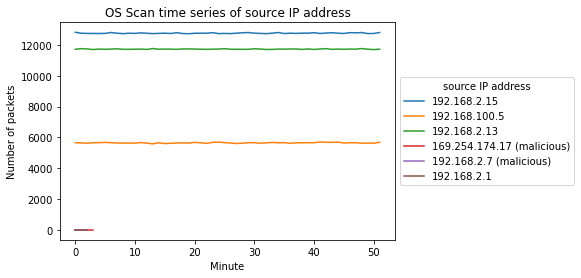

In [23]:

dirs = {'OS Scan': r'C:\COLLEGE\internship\archive (1)\OS Scan\OS_Scan_dataset.csv'}

pcaps = {'OS Scan': r'C:\COLLEGE\internship\archive (1)\OS Scan\OS_Scan_pcap.pcapng'}

labels = {'OS scan':r'C:\COLLEGE\internship\archive (1)\OS Scan\OS_Scan_labels.csv'}

attack_src_packet_time_port_dict = {}
attack_packet_dict = {}
for attack_type in pcaps:
    src_packet_time_port_dict = {}
    packet_list = []

    
    label_df = pd.read_csv(os.path.join(dirs[attack_type], labels['OS scan']))
    if 'x' in label_df:
        label = label_df['x'].tolist()
    else:
        label = label_df['0'].tolist()
        
    packet_count = 0

    for packet in tqdm(PcapReader(os.path.join(dirs[attack_type], pcaps[attack_type]))):
        
        if packet.haslayer(IP):
            src = packet.getlayer(IP).src
            dst = packet.getlayer(IP).dst

            src_list = src_packet_time_port_dict.get(src, [])
            sport, dport = -1, -1
            if packet.haslayer(TCP):
                sport = packet.getlayer(TCP).sport
                dport = packet.getlayer(TCP).dport
            
            if packet_count < len(label):
                l = label[packet_count]
            else:
                l = 1
            src_list.append((packet.time, sport, dst, dport, l))
            packet_list.append((packet.time, src, sport, dst, dport, l))

            src_packet_time_port_dict[src] = src_list
        
        packet_count += 1
    
    attack_src_packet_time_port_dict[attack_type] = src_packet_time_port_dict
    attack_packet_dict[attack_type] = packet_list
    print('There are', len(src_packet_time_port_dict), 'source IP addresses with attack type', attack_type)
    
    dports = {}

    for src in src_packet_time_port_dict:
        for info in src_packet_time_port_dict[src]:
            dports[info[3]] = dports.get(info[3], 0) + 1

    filtered_dport_count_df = pd.DataFrame(dports.items())
    filtered_dport_count_df.columns = ['Port', 'Count']
    # filtered_dport_count_df.loc[filtered_dport_count_df['Count'] < 1.e3, 'Port'] = 'Others' # Represent only large ports
    print('Destination port packet count')
    print(filtered_dport_count_df.head(10))
    
    smallest, largest = -1, 0
    for src in src_packet_time_port_dict:
        # (packet.time, sport, dst, dport, label)
        for info in src_packet_time_port_dict[src]:
            if info[0] > largest:
                largest = info[0]
            if info[0] < smallest or smallest == -1:
                smallest = info[0]
    print('Start timestamp', smallest, 
          'End timestamp', largest, 
          'Timestamp span' ,largest - smallest)
    
    for src in src_packet_time_port_dict:
        src_packets = src_packet_time_port_dict[src]
        packets = []
        is_malicious = False
        for info in src_packet_time_port_dict[src]:
            packet_time = info[0] - smallest
            packets.append(packet_time)
            if info[4] and not is_malicious:
                is_malicious = info[4]
                print(src, 'start malicious activity at', packet_time // 60, 'min')

        start_time, end_time = src_packets[0][0], src_packets[-1][0]
        interval = int(end_time - start_time)
        samples = int((end_time - start_time) // 60)
        
        if samples < 1:
            print(src, 'sent packets less than a min')
            continue
        ys, xs = np.histogram(np.array(packets), bins = samples, range = (0, interval))

        label_str = src
        if is_malicious:
            label_str = label_str + ' (malicious)'
        plt.plot(ys.T, label = label_str)
    plt.legend(title = 'source IP address', loc = 'center left', bbox_to_anchor = (1, 0.5))
    plt.xlabel('Minute')
    plt.ylabel('Number of packets')
    plt.title(attack_type + ' time series of source IP address')
    plt.show()